In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
 df = pd.read_csv('/content/netflix_synthetic_data.csv' , lineterminator='\n')

In [8]:
df.head()

,movie_id,title,genre,release_date,popularity,vote_count,vote_average,duration,language,country,type
0,1,Shadow Journey,Drama|Comedy|Crime,1990-09-25,37.6,16359,2.7,53,Portuguese,Portugal,TV Show
1,2,Broken Memory,History|Family,2012-01-11,68.2,45145,6.0,70,Mandarin,China,TV Show
2,3,Silent Odyssey,Musical|Sci-Fi,1993-07-21,98.3,49344,2.2,173,Spanish,Argentina,Movie
3,4,Night Flame,History|Crime,1992-02-28,34.5,45733,3.0,133,English,Canada,Movie
4,5,Forbidden Dreams,Drama|Musical|Adventure,2008-10-29,61.0,41790,5.4,119,Spanish,Argentina,Movie


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      500 non-null    int64  
 1   title         500 non-null    object 
 2   genre         500 non-null    object 
 3   release_date  500 non-null    object 
 4   popularity    500 non-null    float64
 5   vote_count    500 non-null    int64  
 6   vote_average  500 non-null    float64
 7   duration      500 non-null    int64  
 8   language      500 non-null    object 
 9   country       500 non-null    object 
 10  type          500 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 43.1+ KB


In [10]:
df['genre'].head()

,genre
0,Drama|Comedy|Crime
1,History|Family
2,Musical|Sci-Fi
3,History|Crime
4,Drama|Musical|Adventure


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,movie_id,popularity,vote_count,vote_average,duration
count,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,55.70600,25319.312000,5.438000,96.112000
std,144.481833,25.46761,14570.020185,2.659026,57.819665
min,1.000000,10.60000,154.000000,1.000000,20.000000
25%,125.750000,34.32500,12458.000000,3.000000,47.000000
50%,250.500000,53.90000,25060.500000,5.500000,70.000000
75%,375.250000,77.02500,37874.250000,7.700000,148.250000
max,500.000000,99.90000,49880.000000,10.000000,210.000000


In [13]:
 df['release_date'] = pd.to_datetime(df['release_date'])
 print(df['release_date'].dtypes)

datetime64[ns]


In [14]:
df['release_date'] = df['release_date'].dt.year

In [15]:
df.head()

,movie_id,title,genre,release_date,popularity,vote_count,vote_average,duration,language,country,type
0,1,Shadow Journey,Drama|Comedy|Crime,1990,37.6,16359,2.7,53,Portuguese,Portugal,TV Show
1,2,Broken Memory,History|Family,2012,68.2,45145,6.0,70,Mandarin,China,TV Show
2,3,Silent Odyssey,Musical|Sci-Fi,1993,98.3,49344,2.2,173,Spanish,Argentina,Movie
3,4,Night Flame,History|Crime,1992,34.5,45733,3.0,133,English,Canada,Movie
4,5,Forbidden Dreams,Drama|Musical|Adventure,2008,61.0,41790,5.4,119,Spanish,Argentina,Movie


In [16]:
cols = {'language','duration','country','type','movie_id'}

In [17]:
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['title', 'genre', 'release_date', 'popularity', 'vote_count',
       'vote_average'],
      dtype='object')

In [18]:
df.head()

,title,genre,release_date,popularity,vote_count,vote_average
0,Shadow Journey,Drama|Comedy|Crime,1990,37.6,16359,2.7
1,Broken Memory,History|Family,2012,68.2,45145,6.0
2,Silent Odyssey,Musical|Sci-Fi,1993,98.3,49344,2.2
3,Night Flame,History|Crime,1992,34.5,45733,3.0
4,Forbidden Dreams,Drama|Musical|Adventure,2008,61.0,41790,5.4


In [19]:
def catigorize_col(df, col, labels):
  edges = [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]

  df[col] = pd.cut(df[col], bins=edges, labels = labels, duplicates = 'drop')
  return df

labels = ['not popular', 'below_avg' , 'average' , 'popular']

catigorize_col(df, 'vote_average', labels)

df['vote_average'].unique()

['not popular', 'average', 'below_avg', 'popular', NaN]
Categories (4, object): ['not popular' < 'below_avg' < 'average' < 'popular']

In [20]:
df.head()

,title,genre,release_date,popularity,vote_count,vote_average
0,Shadow Journey,Drama|Comedy|Crime,1990,37.6,16359,not popular
1,Broken Memory,History|Family,2012,68.2,45145,average
2,Silent Odyssey,Musical|Sci-Fi,1993,98.3,49344,not popular
3,Night Flame,History|Crime,1992,34.5,45733,not popular
4,Forbidden Dreams,Drama|Musical|Adventure,2008,61.0,41790,below_avg


In [21]:
df['vote_average'].value_counts()

,count
vote_average,
below_avg,127
popular,124
average,123
not popular,122


In [22]:
df.dropna(inplace = True)
df.isna().sum()

,0
title,0
genre,0
release_date,0
popularity,0
vote_count,0
vote_average,0


In [23]:
 df['genre'] = df['genre'].str.split(', ')
 # explode the lists
 df = df.explode('genre').reset_index(drop=True)
 df.head()

,title,genre,release_date,popularity,vote_count,vote_average
0,Shadow Journey,Drama|Comedy|Crime,1990,37.6,16359,not popular
1,Broken Memory,History|Family,2012,68.2,45145,average
2,Silent Odyssey,Musical|Sci-Fi,1993,98.3,49344,not popular
3,Night Flame,History|Crime,1992,34.5,45733,not popular
4,Forbidden Dreams,Drama|Musical|Adventure,2008,61.0,41790,below_avg


In [24]:
 df['genre'] = df['genre'].astype('category')
 # confirming changes
 df['genre'].dtypes

CategoricalDtype(categories=['Action', 'Action|Adventure', 'Action|Animation|Family',
                  'Action|Animation|Musical', 'Action|Animation|Thriller',
                  'Action|Comedy|Animation', 'Action|Comedy|Fantasy',
                  'Action|Comedy|Musical', 'Action|Crime',
                  'Action|Documentary',
                  ...
                  'Thriller|Comedy', 'Thriller|Documentary|Adventure',
                  'Thriller|Drama', 'Thriller|Family',
                  'Thriller|Family|Mystery', 'Thriller|Horror|History',
                  'Thriller|Musical', 'Thriller|Mystery|Comedy',
                  'Thriller|Romance|Comedy', 'Thriller|Sci-Fi|Romance'],
, ordered=False, categories_dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   title         496 non-null    object  
 1   genre         496 non-null    category
 2   release_date  496 non-null    int32   
 3   popularity    496 non-null    float64 
 4   vote_count    496 non-null    int64   
 5   vote_average  496 non-null    category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 25.7+ KB


In [26]:
df.nunique()

,0
title,274
genre,291
release_date,35
popularity,380
vote_count,494
vote_average,4


In [27]:
 sns.set_style('whitegrid')

In [29]:
 df['genre'].describe()

,genre
count,496
unique,291
top,Horror
freq,13


<Figure size 1000x1000 with 0 Axes>

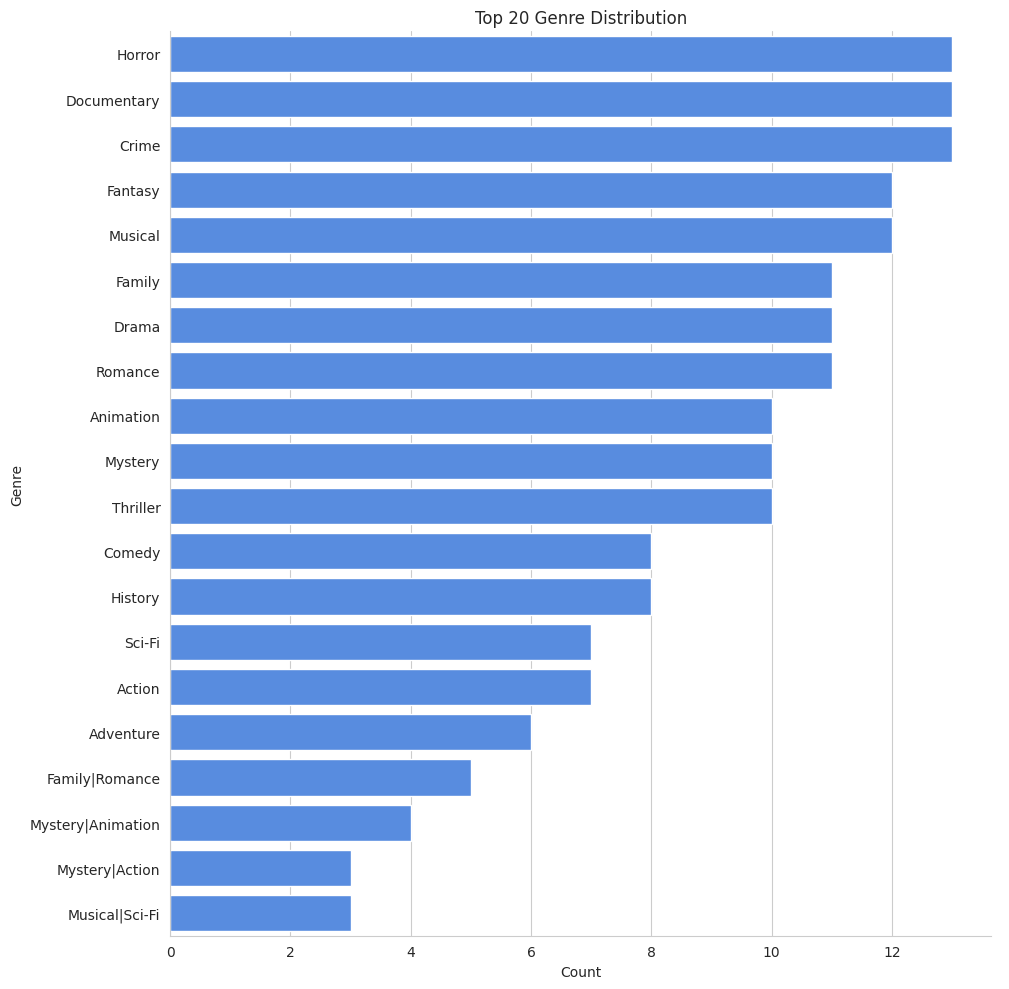

In [38]:

top_genres = df['genre'].value_counts().nlargest(20).index


df_top_genres = df[df['genre'].isin(top_genres)]

sns.set_style('whitegrid')


plt.figure(figsize=(10, 10))

sns.catplot(y = 'genre', data = df_top_genres, kind = 'count',
            order = top_genres,
            color = '#4287f5',
            height=10, aspect=1)

plt.title('Top 20 Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')

plt.tight_layout()

plt.show()

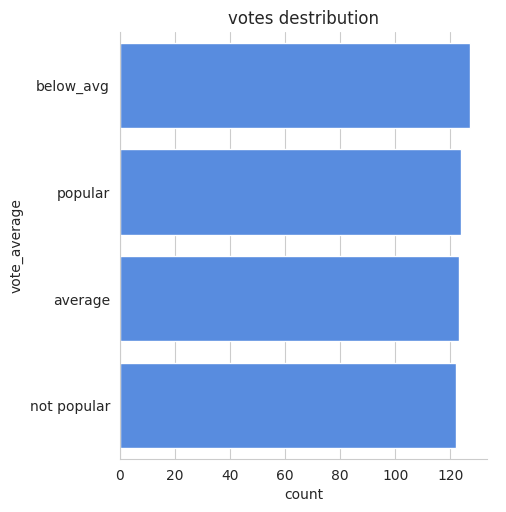

In [42]:
sns.catplot(y = 'vote_average', data = df, kind = 'count',
order = df['vote_average'].value_counts().index,
 color = '#4287f5')
plt.title('votes destribution')
plt.show()

In [44]:
df[df['popularity'] == df['popularity'].max()]

,title,genre,release_date,popularity,vote_count,vote_average
365,Infinite Dreams,Family,2024,99.9,25100,below_avg
416,Dark Spectrum,Fantasy|Drama|Romance,2010,99.9,37123,average


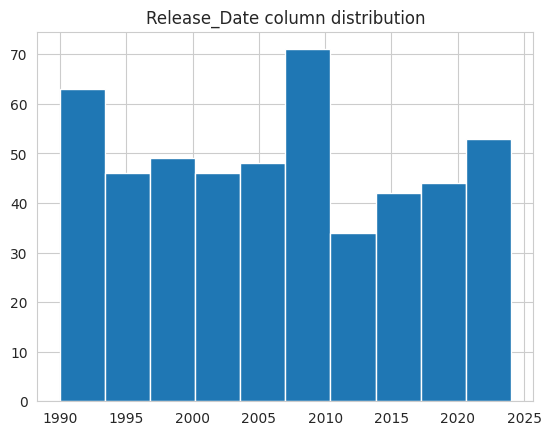

In [46]:
df['release_date'].hist()
plt.title('Release_Date column distribution')
plt.show()